# Load Data


Dataset diunduh dari Kaggle, kemudian file Books.csv, Users.csv, dan Ratings.csv dimuat menggunakan pandas. Proses ini bertujuan untuk menyediakan data buku, pengguna, dan rating yang akan digunakan dalam membangun model rekomendasi.


In [1]:
import pandas as pd

Books = pd.read_csv('/content/Books.csv')
Ratings = pd.read_csv('/content/Ratings.csv')
Users = pd.read_csv('/content/Users.csv')

print('Jumlah data Buku: ', len(Books.ISBN.unique()))
print('Jumlah data penilaian Buku: ', len(Ratings.ISBN.unique()))
print('Jumlah data Pengguna: ', len(Users['User-ID'].unique()))

<ipython-input-1-bf6d0f5f586a>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  Books = pd.read_csv('/content/Books.csv')


Jumlah data Buku:  271360
Jumlah data penilaian Buku:  340556
Jumlah data Pengguna:  278858


Pengecekan missing Values pada setiap dataset

In [3]:
print("Missing Values - Books.csv")
print(Books.isnull().sum())
print("\n")

print("Missing Values - Users.csv")
print(Users.isnull().sum())
print("\n")

print("Missing Values - Ratings.csv")
print(Ratings.isnull().sum())
print("\n")

# Tambahan: Hitung jumlah rating dengan nilai 0 di Ratings.csv
zero_ratings = (Ratings['Book-Rating'] == 0).sum()
total_ratings = Ratings.shape[0]
print(f"Jumlah rating = 0: {zero_ratings} ({(zero_ratings / total_ratings) * 100:.2f}%)")


Missing Values - Books.csv
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


Missing Values - Users.csv
User-ID          0
Location         0
Age         110762
dtype: int64


Missing Values - Ratings.csv
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


Jumlah rating = 0: 716109 (62.28%)


# Data Preprocessing

Tahapan ini mencakup pembersihan dan transformasi data agar siap digunakan untuk pelatihan model. Beberapa langkah umum meliputi:

- Menghapus data kosong (missing values)
- Normalisasi atau standarisasi fitur
- Encoding label atau fitur kategorikal jika diperlukan

dan juga menggabungkan seleruh Data berdasarkan ISBN

In [ ]:
import numpy as np

# Menggabungkan seluruh ISBN pada kategori Restaurant
buku_all = np.concatenate((
    Books.ISBN.unique(),
    Ratings.ISBN.unique(),
    Users['User-ID'].unique().astype(str),

))

# Mengurutkan data dan menghapus data yang sama
buku_all = np.sort(np.unique(buku_all))

print('Jumlah seluruh data buku berdasarkan ISBN: ', len(buku_all))

Jumlah seluruh data buku berdasarkan ISBN:  620623


Pada tahap ini kita akan menggabungkan seluruh user


In [ ]:
# Menggabungkan seluruh userID
user_all = np.concatenate((
     Users['User-ID'].unique().astype(str),
))

# Menghapus data yang sama kemudian mengurutkannya
user_all = np.sort(np.unique(user_all))

print('Jumlah seluruh user: ', len(user_all))

Jumlah seluruh user:  278858


Kode ini di bawah bertujuan untuk membentuk satu DataFrame lengkap (book_info) yang menyatukan:

Informasi rating buku dari user,

Detail user,

Detail buku.

In [ ]:
Rating_info = pd.merge(Ratings, Users, on='User-ID', how='left')
book_info = pd.merge(Rating_info, Books, on='ISBN', how='left')

book_info.head()

User-ID        ISBN  Book-Rating                       Location   Age  \
0   276725  034545104X            0              tyler, texas, usa   NaN   
1   276726  0155061224            5       seattle, washington, usa   NaN   
2   276727  0446520802            0  h, new south wales, australia  16.0   
3   276729  052165615X            3           rijeka, n/a, croatia  16.0   
4   276729  0521795028            6           rijeka, n/a, croatia  16.0   

                                          Book-Title      Book-Author  \
0                               Flesh Tones: A Novel       M. J. Rose   
1                                   Rites of Passage       Judith Rae   
2                                       The Notebook  Nicholas Sparks   
3                                     Help!: Level 1    Philip Prowse   
4  The Amsterdam Connection : Level 4 (Cambridge ...      Sue Leather   

  Year-Of-Publication                   Publisher  \
0                2002            Ballantine Books   
1                2001                      Heinle   
2                1996                Warner Books   
3                1999  Cambridge University Press   
4                2001  Cambridge University Press   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/034545104X.0...   
1  http://images.amazon.com/images/P/0155061224.0...   
2  http://images.amazon.com/images/P/0446520802.0...   
3  http://images.amazon.com/images/P/052165615X.0...   
4  http://images.amazon.com/images/P/0521795028.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/034545104X.0...   
1  http://images.amazon.com/images/P/0155061224.0...   
2  http://images.amazon.com/images/P/0446520802.0...   
3  http://images.amazon.com/images/P/052165615X.0...   
4  http://images.amazon.com/images/P/0521795028.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/034545104X.0...  
1  http://images.amazon.com/images/P/0155061224.0...  
2  http://images.amazon.com/images/P/0446520802.0...  
3  http://images.amazon.com/images/P/052165615X.0...  
4  http://images.amazon.com/images/P/0521795028.0...

Perintah ini sangat berguna sebagai langkah awal dalam eksplorasi data (EDA) untuk mengetahui apakah ada data yang tidak lengkap, dan di kolom mana saja kekurangan tersebut terjadi. Setelah ini, kamu bisa melakukan data cleaning

In [ ]:
# Cek missing value dengan fungsi isnull()
book_info.isnull().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Location                    0
Age                    309492
Book-Title             118644
Book-Author            118646
Year-Of-Publication    118644
Publisher              118646
Image-URL-S            118644
Image-URL-M            118644
Image-URL-L            118648
dtype: int64

Untuk Mengelompokkan dan Menjumlahkan Rating Berdasarkan ISBN

In [ ]:
Ratings_grouped = Ratings.groupby('ISBN').sum(numeric_only=True)
print(Ratings_grouped.head())

            User-ID  Book-Rating
ISBN                            
0330299891   271009            6
0375404120   356057            3
0586045007    89192            0
9022906116   100868            7
9032803328    89192            0


 Untuk Menyimpan hasil agregasi rating ke variabel all_book_Ratings (meskipun ini identik dengan Ratings_grouped, bisa jadi ini untuk klarifikasi makna variabel).*

In [ ]:
all_book_Ratings = Ratings_grouped
all_book_Ratings

User-ID  Book-Rating
ISBN                             
 0330299891   271009            6
 0375404120   356057            3
 0586045007    89192            0
 9022906116   100868            7
 9032803328    89192            0
...              ...          ...
cn113107      107301            0
ooo7156103    266146            7
§423350229     85250            0
´3499128624    86103            8
Ô½crosoft     187517            7

[340556 rows x 2 columns]

kode di bawah ini befungsi untuk mengabungkan rating dan judul buku berdasarkan ISBN dan juga Menampilkan 5 Data Teratas

In [ ]:
# Gabungkan rating dengan judul buku berdasarkan ISBN
all_book_name = pd.merge(all_book_Ratings, Books[['ISBN', 'Book-Title']], on='ISBN', how='left')

# Gabungkan hasil di atas dengan data pengarang dan tahun terbit
all_books = pd.merge(all_book_name, Books[['ISBN', 'Book-Author', 'Year-Of-Publication']], on='ISBN', how='left')

# Tampilkan hasil akhir
all_books.head()

ISBN  User-ID  Book-Rating Book-Title Book-Author  \
0   0330299891   271009            6        NaN         NaN   
1   0375404120   356057            3        NaN         NaN   
2   0586045007    89192            0        NaN         NaN   
3   9022906116   100868            7        NaN         NaN   
4   9032803328    89192            0        NaN         NaN   

  Year-Of-Publication  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

# Data Preparation

Untuk mengecek jumlah data yang hilang (missing values) pada setiap kolom dalam DataFrame all_books.



In [ ]:
# Mengecek missing value pada dataframe all_books
all_books.isnull().sum()

ISBN                       0
User-ID                    0
Book-Rating                0
Book-Title             70405
Book-Author            70407
Year-Of-Publication    70405
dtype: int64

kode ini bertujuan untuk Menghapus semua baris (record) dalam DataFrame all_books yang memiliki missing value (NaN) di salah satu atau lebih kolom.



In [ ]:
# Membersihkan missing value
all_books_clean = all_books.dropna()
all_books_clean

ISBN  User-ID  Book-Rating  \
107     0000913154   171118            8   
108     0001010565   295639            0   
111     0001046438    23902            9   
113     0001046713   196149            0   
114     000104687X    23902            6   
...            ...      ...          ...   
339973  B000234N76   264317            0   
339974  B000234NC6   100906            0   
339975  B00029DGGO   100088            0   
339976  B0002JV9PY   179791            0   
339977  B0002K6K8O   179791            0   

                                               Book-Title  \
107     The Way Things Work: An Illustrated Encycloped...   
108                                       Mog's Christmas   
111                                                  Liar   
113                          Twopence to Cross the Mersey   
114     T.S. Eliot Reading \The Wasteland\" and Other ...   
...                                                   ...   
339973                                     Falling Angels   
339974  It Must've Been Something I Ate: The Return of...   
339975                        Good Wife Strikes Back, The   
339976                               The Blockade Runners   
339977                               The Underground City   

                          Book-Author Year-Of-Publication  
107     C. van Amerongen (translator)                1967  
108                       Judith Kerr                1992  
111                       Stephen Fry                   0  
113                   Helen Forrester                1992  
114                        T.S. Eliot                1993  
...                               ...                 ...  
339973                Tracy Chevalier                2001  
339974            Jeffrey Steingarten                2002  
339975               Elizabeth Buchan                   0  
339976                    Jules Verne                   0  
339977                    Jules Verne                   0  

[270149 rows x 6 columns]

In [ ]:
# Mengecek kembali missing value
all_books_clean.isnull().sum()


ISBN                   0
User-ID                0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
dtype: int64

Untuk mengurutkan DataFrame all_books_clean berdasarkan kolom ISBN secara menaik (ascending), dan menyimpannya ke dalam variabel baru fix_books.

In [ ]:
# Mengurutkan berdasarkan ISBN
fix_books = all_books_clean.sort_values('ISBN', ascending=True)
fix_books

ISBN  User-ID  Book-Rating  \
107     0000913154   171118            8   
108     0001010565   295639            0   
111     0001046438    23902            9   
113     0001046713   196149            0   
114     000104687X    23902            6   
...            ...      ...          ...   
339973  B000234N76   264317            0   
339974  B000234NC6   100906            0   
339975  B00029DGGO   100088            0   
339976  B0002JV9PY   179791            0   
339977  B0002K6K8O   179791            0   

                                               Book-Title  \
107     The Way Things Work: An Illustrated Encycloped...   
108                                       Mog's Christmas   
111                                                  Liar   
113                          Twopence to Cross the Mersey   
114     T.S. Eliot Reading \The Wasteland\" and Other ...   
...                                                   ...   
339973                                     Falling Angels   
339974  It Must've Been Something I Ate: The Return of...   
339975                        Good Wife Strikes Back, The   
339976                               The Blockade Runners   
339977                               The Underground City   

                          Book-Author Year-Of-Publication  
107     C. van Amerongen (translator)                1967  
108                       Judith Kerr                1992  
111                       Stephen Fry                   0  
113                   Helen Forrester                1992  
114                        T.S. Eliot                1993  
...                               ...                 ...  
339973                Tracy Chevalier                2001  
339974            Jeffrey Steingarten                2002  
339975               Elizabeth Buchan                   0  
339976                    Jules Verne                   0  
339977                    Jules Verne                   0  

[270149 rows x 6 columns]

Untuk menghitung jumlah buku yang berbeda dalam DataFrame fix_books berdasarkan kode ISBN yang unik.

In [ ]:
# Mengecek jumlah ISBN unik (jumlah buku yang berbeda)
print("Jumlah buku unik:", fix_books['ISBN'].nunique())

Jumlah buku unik: 270149


Untuk mengetahui berapa banyak penulis berbeda (unik) yang ada di dalam data buku, serta menampilkan daftar nama penulis tersebut.

In [ ]:
# Mengecek kategori unik (misalnya berdasarkan pengarang sebagai kategori konten)
print("Jumlah penulis unik:", fix_books['Book-Author'].nunique())
print("Penulis unik:", fix_books['Book-Author'].unique())

Jumlah penulis unik: 101587
Penulis unik: ['C. van Amerongen (translator)' 'Judith Kerr' 'Stephen Fry' ...
 'Rachel Abramowitz' 'P Ed Varnedoe/Antonelli Kick'
 'New York Public Library']


Menampilkan semua data buku dalam DataFrame fix_books yang ditulis oleh penulis tertentu, dalam hal ini 'J.K. Rowling'.

In [ ]:
# Mengecek buku yang ditulis oleh penulis bernama 'J.K. Rowling'
fix_books[fix_books['Book-Author'] == 'J.K. Rowling']

ISBN  User-ID  Book-Rating  \
98878   043965548X  1190655           53   
185289  0747561966   531405           14   
242164  0939173344   211758            0   
272287  1855494981   674801            0   
272288  1855496704   210022            8   
272289  185549860X    76626            9   
283162  2070556859   774769           37   
321966  8475967744   139884            7   
321968  8475967760   152855            9   
322762  8478889019   713656            9   

                                               Book-Title   Book-Author  \
98878   Harry Potter and the Prisoner of Azkaban (Harr...  J.K. Rowling   
185289           Harry Potter and the Philosopher's Stone  J.K. Rowling   
242164              Harry Potter and the Sorcerer's Stone  J.K. Rowling   
272287  Harry Potter and the Philosopher's Stone (Cove...  J.K. Rowling   
272288  Harry Potter and the Philosopher's Stone (Cove...  J.K. Rowling   
272289           Harry Potter and the Philosopher's Stone  J.K. Rowling   
283162  Harry Potter et l'Ordre du PhÃ©nix (Harry Pott...  J.K. Rowling   
321966                               I La Pedra Filosofal  J.K. Rowling   
321968                                I El Pres D'askaban  J.K. Rowling   
322762                Harry Potter y la Ã?rden del FÃ©nix  J.K. Rowling   

       Year-Of-Publication  
98878                 2004  
185289                2003  
242164                1999  
272287                1999  
272288                2000  
272289                1999  
283162                2003  
321966                   0  
321968                   0  
322762                2004

Memfilter dan menampilkan baris-baris pada DataFrame fix_books yang memiliki judul buku sama dengan 'Harry Potter and the Chamber of Secrets'.

In [ ]:
# Mengecek buku dengan judul tertentu (misalnya 'Harry Potter and the Chamber of Secrets')
fix_books[fix_books['Book-Title'] == 'Harry Potter and the Chamber of Secrets']

ISBN  User-ID  Book-Rating  \
185114  0747545774    94576           18   
250633  1551922444   298917           10   

                                     Book-Title    Book-Author  \
185114  Harry Potter and the Chamber of Secrets  J. K. Rowling   
250633  Harry Potter and the Chamber of Secrets  J. K. Rowling   

       Year-Of-Publication  
185114                2000  
250633                2000

In [ ]:
# Mengubah nama penulis 'J.K. Rowling' menjadi 'Joanne Rowling'
fix_books = fix_books.replace('J.K. Rowling', 'Joanne Rowling')

In [ ]:
# Mengecek kembali buku dengan judul yang sama untuk melihat perubahan penulis
fix_books[fix_books['Book-Title'] == 'Harry Potter and the Chamber of Secrets']

ISBN  User-ID  Book-Rating  \
185114  0747545774    94576           18   
250633  1551922444   298917           10   

                                     Book-Title    Book-Author  \
185114  Harry Potter and the Chamber of Secrets  J. K. Rowling   
250633  Harry Potter and the Chamber of Secrets  J. K. Rowling   

       Year-Of-Publication  
185114                2000  
250633                2000



* Menyalin DataFrame fix_books ke variabel baru bernama preparation untuk persiapan proses analisis atau manipulasi data lebih lanjut.

* Mengurutkan preparation berdasarkan kolom ISBN secara menaik (ascending).
   



In [ ]:
# Menyalin isi fix_books ke dalam preparation
preparation = fix_books
preparation = preparation.sort_values('ISBN', ascending=True)


Menghilangkan baris-baris duplikat dalam DataFrame preparation berdasarkan kolom ISBN, sehingga hanya menyisakan satu baris per buku unik.



In [ ]:
# Menghapus duplikat berdasarkan ISBN (mengambil satu buku unik saja)
preparation = preparation.drop_duplicates('ISBN')
preparation


ISBN  User-ID  Book-Rating  \
107     0000913154   171118            8   
108     0001010565   295639            0   
111     0001046438    23902            9   
113     0001046713   196149            0   
114     000104687X    23902            6   
...            ...      ...          ...   
339973  B000234N76   264317            0   
339974  B000234NC6   100906            0   
339975  B00029DGGO   100088            0   
339976  B0002JV9PY   179791            0   
339977  B0002K6K8O   179791            0   

                                               Book-Title  \
107     The Way Things Work: An Illustrated Encycloped...   
108                                       Mog's Christmas   
111                                                  Liar   
113                          Twopence to Cross the Mersey   
114     T.S. Eliot Reading \The Wasteland\" and Other ...   
...                                                   ...   
339973                                     Falling Angels   
339974  It Must've Been Something I Ate: The Return of...   
339975                        Good Wife Strikes Back, The   
339976                               The Blockade Runners   
339977                               The Underground City   

                          Book-Author Year-Of-Publication  
107     C. van Amerongen (translator)                1967  
108                       Judith Kerr                1992  
111                       Stephen Fry                   0  
113                   Helen Forrester                1992  
114                        T.S. Eliot                1993  
...                               ...                 ...  
339973                Tracy Chevalier                2001  
339974            Jeffrey Steingarten                2002  
339975               Elizabeth Buchan                   0  
339976                    Jules Verne                   0  
339977                    Jules Verne                   0  

[270149 rows x 6 columns]

Mengubah tiga kolom penting dari DataFrame preparation menjadi list Python untuk memudahkan pemrosesan data lebih lanjut di luar DataFrame, misalnya untuk indexing, manipulasi manual, atau input ke algoritma lain.

In [ ]:
# Konversi kolom ISBN, Book-Title, dan Book-Author ke dalam bentuk list
book_isbn = preparation['ISBN'].tolist()
book_title = preparation['Book-Title'].tolist()
book_author = preparation['Book-Author'].tolist()

print(len(book_isbn))
print(len(book_title))
print(len(book_author))


270149
270149
270149


Membuat sebuah DataFrame baru bernama book_new yang berisi informasi buku dengan kolom yang lebih ringkas dan terstruktur:

* id → berisi ISBN buku,

* book_title → berisi judul buku,

* author → berisi nama penulis buku.



In [ ]:
# Membuat DataFrame baru untuk data buku
book_new = pd.DataFrame({
    'id': book_isbn,
    'book_title': book_title,
    'author': book_author
})

# Tampilkan dataframe hasil
book_new


id                                         book_title  \
0       0000913154  The Way Things Work: An Illustrated Encycloped...   
1       0001010565                                    Mog's Christmas   
2       0001046438                                               Liar   
3       0001046713                       Twopence to Cross the Mersey   
4       000104687X  T.S. Eliot Reading \The Wasteland\" and Other ...   
...            ...                                                ...   
270144  B000234N76                                     Falling Angels   
270145  B000234NC6  It Must've Been Something I Ate: The Return of...   
270146  B00029DGGO                        Good Wife Strikes Back, The   
270147  B0002JV9PY                               The Blockade Runners   
270148  B0002K6K8O                               The Underground City   

                               author  
0       C. van Amerongen (translator)  
1                         Judith Kerr  
2                         Stephen Fry  
3                     Helen Forrester  
4                          T.S. Eliot  
...                               ...  
270144                Tracy Chevalier  
270145            Jeffrey Steingarten  
270146               Elizabeth Buchan  
270147                    Jules Verne  
270148                    Jules Verne  

[270149 rows x 3 columns]

Mengambil 5 sampel data acak dari DataFrame book_new dan menampilkannya, untuk melihat contoh data buku secara acak.



In [ ]:
data = book_new
data.sample(5)

id                                         book_title  \
228567  1570425434  A Kind of Grace : The Autobiography of the Wor...   
261059  3746660939                                 Reise um die Welt.   
200727  0881848891                            The Allingham Case-Book   
225900  1565845455                    American Dreams: Lost and Found   
22776   0155174088            Detective Fiction: Crime and Compromise   

                       author  
228567          Sonja Steptoe  
261059  Adelbert von Chamisso  
200727      Margery Allingham  
225900           Studs Terkel  
22776   Richard Stanley Allen

Mengganti nama kolom 'Book-Title' menjadi 'book_title' di DataFrame book_new.



In [ ]:
book_new = book_new.rename(columns={'Book-Title': 'book_title'}, inplace=False)

Kode ini bertujuan untuk melakukan pembersihan dan normalisasi teks judul buku lalu mengekstrak fitur teks menggunakan metode TF-IDF (Term Frequency-Inverse Document Frequency)

In [ ]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

book_new = book_new.copy()

def clean_title(text):
    if pd.isna(text):
        return ''
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    tokens = [word for word in text.split() if len(word) > 2]
    return ' '.join(tokens)

book_new['book_title'] = book_new['book_title'].apply(clean_title)

tf = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.8)
tf.fit(book_new['book_title'])

print(tf.get_feature_names_out()[:20])

['aaa' 'aaron' 'aba' 'abacus' 'abaddon' 'abandon' 'abandoned' 'abbey'
 'abbeys' 'abbott' 'abby' 'abc' 'abcs' 'abducted' 'abduction' 'abductions'
 'abe' 'abel' 'abenteuer' 'abenteuerliche']




*   Menampilkan daftar nama kolom pada DataFrame Books. Ini berguna untuk memahami struktur data dan kolom apa saja yang tersedia.
*   Mengambil dan menampilkan 10 contoh judul buku secara acak dari kolom 'Book-Title'. Ini membantu untuk melihat contoh data nyata dari judul buku dalam dataset.



In [ ]:
print(Books.columns)
print(Books['Book-Title'].sample(10))

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
196959                                       State of Grace
35755        Full Recovery (Emergency!) (Superromance, 925)
156035                   Australia the Beautiful Wilderness
118331                                               Cobain
213741                                         L.A. Justice
148939    The Couple Who Fell in Hate: And Other Tales o...
147888                               Women's Wit and Wisdom
133372                                  Hangin' With O-Town
20330                                          Eighth Dwarf
210782    Robert Browning: Selected Poetry (The Penguin ...
Name: Book-Title, dtype: object


* Melatih model TF-IDF pada data judul buku (data['book_title']) dan langsung mengubah data teks tersebut menjadi matriks fitur numerik.

* Memeriksa ukuran (dimensi) matriks TF-IDF yang dihasilkan.



In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['book_title'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(270149, 20722)

Mengubah matriks TF-IDF yang berjenis sparse matrix menjadi matriks dense (padat) dalam bentuk array 2 dimensi.

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Membuat DataFrame dari matriks TF-IDF yang sudah berbentuk dense, lalu menampilkan sampel acak dari 22 kolom fitur (kata) dan 10 baris data (judul buku) untuk melihat distribusi bobot TF-IDF pada subset data.



In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data['book_title']
).sample(22, axis=1).sample(10, axis=0)

canvas  overture  prom  \
book_title                                                                   
Emerald Ecstasy                                        0.0       0.0   0.0   
Lost Japan                                             0.0       0.0   0.0   
Duck's Breath and Mouse Pie: A Collection of An...     0.0       0.0   0.0   
Bubbles in Trouble (Bubbles Books)                     0.0       0.0   0.0   
STREETS OF LAREDO                                      0.0       0.0   0.0   
Frieda's Song (Heartsong Presents, # 375)              0.0       0.0   0.0   
The Incomparable Miss Brady                            0.0       0.0   0.0   
Conceived With Malice/Literature As Revenge in ...     0.0       0.0   0.0   
Better Than Sane: Tales from a Dangling Girl           0.0       0.0   0.0   
The Book of Margery Kempe (TEAMS Middle English...     0.0       0.0   0.0   

                                                    sabbatical  christianity  \
book_title                                                                     
Emerald Ecstasy                                            0.0           0.0   
Lost Japan                                                 0.0           0.0   
Duck's Breath and Mouse Pie: A Collection of An...         0.0           0.0   
Bubbles in Trouble (Bubbles Books)                         0.0           0.0   
STREETS OF LAREDO                                          0.0           0.0   
Frieda's Song (Heartsong Presents, # 375)                  0.0           0.0   
The Incomparable Miss Brady                                0.0           0.0   
Conceived With Malice/Literature As Revenge in ...         0.0           0.0   
Better Than Sane: Tales from a Dangling Girl               0.0           0.0   
The Book of Margery Kempe (TEAMS Middle English...         0.0           0.0   

                                                    courier  331  knitter  \
book_title                                                                  
Emerald Ecstasy                                         0.0  0.0      0.0   
Lost Japan                                              0.0  0.0      0.0   
Duck's Breath and Mouse Pie: A Collection of An...      0.0  0.0      0.0   
Bubbles in Trouble (Bubbles Books)                      0.0  0.0      0.0   
STREETS OF LAREDO                                       0.0  0.0      0.0   
Frieda's Song (Heartsong Presents, # 375)               0.0  0.0      0.0   
The Incomparable Miss Brady                             0.0  0.0      0.0   
Conceived With Malice/Literature As Revenge in ...      0.0  0.0      0.0   
Better Than Sane: Tales from a Dangling Girl            0.0  0.0      0.0   
The Book of Margery Kempe (TEAMS Middle English...      0.0  0.0      0.0   

                                                    preludes  hallmark  ...  \
book_title                                                              ...   
Emerald Ecstasy                                          0.0       0.0  ...   
Lost Japan                                               0.0       0.0  ...   
Duck's Breath and Mouse Pie: A Collection of An...       0.0       0.0  ...   
Bubbles in Trouble (Bubbles Books)                       0.0       0.0  ...   
STREETS OF LAREDO                                        0.0       0.0  ...   
Frieda's Song (Heartsong Presents, # 375)                0.0       0.0  ...   
The Incomparable Miss Brady                              0.0       0.0  ...   
Conceived With Malice/Literature As Revenge in ...       0.0       0.0  ...   
Better Than Sane: Tales from a Dangling Girl             0.0       0.0  ...   
The Book of Margery Kempe (TEAMS Middle English...       0.0       0.0  ...   

                                                    bonnie  schaum  \
book_title                                                           
Emerald Ecstasy                                        0.0     0.0   
Lost Japan                                             0.0     0.0   


code ini bertujuan untuk Membangun sistem rekomendasi buku yang merekomendasikan buku lain dengan judul serupa berdasarkan kemiripan konten teks (judul buku) menggunakan metode TF-IDF dan cosine similarity.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import pandas as pd

# Pastikan kolom tidak kosong dan batasi data jika perlu
book_new = book_new.dropna(subset=['book_title'])
book_new = book_new.head(1000)  # Optional: batasi data agar Colab tidak crash

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=700, stop_words='english')
tfidf_matrix = tfidf.fit_transform(book_new['book_title'])

# Matriks cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim, index=book_new['book_title'], columns=book_new['book_title'])

def book_recommendations(book_title, similarity_data=cosine_sim_df, items=book_new[['book_title', 'author']], k=5):
    if book_title not in similarity_data.index:
        print(f"Error: Book title '{book_title}' not found.")
        return pd.DataFrame()

    sim_scores = similarity_data[book_title].sort_values(ascending=False)
    top_books = sim_scores.iloc[1:k+1].index  # Hindari buku itu sendiri
    return pd.DataFrame(top_books, columns=['book_title']).merge(items, on='book_title', how='left')


In [ ]:
# Ambil subset dari 1000 buku (harus sama dengan data saat membuat TF-IDF)
books_1000 = Books.head(1000).copy()
books_1000['clean_title'] = books_1000['Book-Title'].str.lower().str.strip()

def book_recommendations(title, cosine_sim=cosine_sim, df=books_1000):
    title = title.lower().strip()

    if title not in df['clean_title'].values:
        print(f"Error: Book title '{title}' not found.")
        return

    idx = df[df['clean_title'] == title].index[0]
    relative_idx = df.index.get_loc(idx)  # karena index asli bisa tidak mulai dari 0

    sim_scores = list(enumerate(cosine_sim[relative_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]
    book_indices = [i[0] for i in sim_scores]

    return df.iloc[book_indices]['Book-Title']

In [ ]:
from difflib import get_close_matches

title_input = "Harry Potter and the Sorcerer's Stone"
all_titles = books_1000['Book-Title'].tolist()

# Cari judul yang mirip
matches = get_close_matches(title_input, all_titles, n=5, cutoff=0.5)
print(matches)


['Homeland and Other Stories', 'Daisy Fay and the Miracle Man', 'The Proud and the Free']


In [ ]:
from difflib import get_close_matches

def book_recommendations(title, cosine_sim, df):
    # Cari judul paling mirip
    matches = get_close_matches(title, df['Book-Title'], n=1, cutoff=0.5)
    if not matches:
        return f"❌ Error: Judul '{title}' tidak ditemukan dalam data."

    matched_title = matches[0]
    print(f"🔍 Menggunakan judul paling mendekati: '{matched_title}'")

    idx = df[df['Book-Title'] == matched_title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    book_indices = [i[0] for i in sim_scores]
    return df.iloc[book_indices][['Book-Title', 'Book-Author']]


In [ ]:
book_recommendations("Harry Potter and the Sorcerer's Stone", cosine_sim, books_1000)


🔍 Menggunakan judul paling mendekati: 'Homeland and Other Stories'


Book-Title       Book-Author
498                                       Househusband         AD HUDLER
431        Negra i consentida (ColÂ¨lecciÃ³ El Mirall)     OfÃ¨lia Dracs
639  MoveOn's 50 Ways to Love Your Country: How to ...            Moveon
404                                       Lakota Woman     Dog Mary Crow
226                                         The Rescue   Nicholas Sparks
774                                    Julie and Romeo        Jeanne Ray
389                        Jonathan Livingston Seagull      Richard Bach
583                                       Four Blondes  Candace Bushnell
629    The First Journey (Animorphs. Alternamorphs, 1)   K. A. Applegate
254                                        Night Watch   Terry Pratchett

# Data Understanding

In [ ]:
# Import library
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

untuk membaca dataset Ratings

In [ ]:
# Membaca dataset

df = Ratings
df

User-ID         ISBN  Book-Rating
0         276725   034545104X            0
1         276726   0155061224            5
2         276727   0446520802            0
3         276729   052165615X            3
4         276729   0521795028            6
...          ...          ...          ...
1149775   276704   1563526298            9
1149776   276706   0679447156            0
1149777   276709   0515107662           10
1149778   276721   0590442449           10
1149779   276723  05162443314            8

[1149780 rows x 3 columns]

# Data Preparation

Kode ini bertujuan untuk mengubah nilai User-ID yang mungkin berupa string atau angka acak menjadi representasi angka yang berurutan (encoding numerik) sehingga lebih mudah diproses dalam algoritma machine learning, terutama yang membutuhkan input numerik.



In [ ]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['User-ID'].unique().tolist()
print('list userID: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [276725, 276726, 276727, 276729, 276733, 276736, 276737, 276744, 276745, 276746, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276765, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276803, 276804, 276806, 276808, 276811, 276812, 276813, 276814, 276817, 276820, 276822, 276827, 276828, 276830, 276832, 276833, 276835, 276837, 276838, 276840, 276842, 276847, 276848, 276850, 276852, 276853, 276854, 276856, 276857, 276859, 276861, 276862, 276863, 276866, 276869, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276889, 276890, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276943, 276946, 276949, 276950, 276953, 276954, 276957, 276959, 276963, 276964, 276965, 276975, 276981, 276984, 276986, 276988, 276989, 276990, 276992, 276994, 276997, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277019, 277022, 277023, 277028, 277031, 277032, 277035, 277036, 2

Mengubah data kolom 'ISBN' yang mungkin berupa string dengan nilai unik menjadi angka indeks untuk memudahkan pemrosesan, khususnya pada aplikasi machine learning atau sistem rekomendasi.



In [ ]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
book_ids = df['ISBN'].unique().tolist()

# Melakukan proses encoding ISBN
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}

# Melakukan proses encoding angka ke ISBN
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

Kode ini bertujuan untuk menambahkan dua kolom baru pada dataframe df yang berisi versi encoded (angka) dari User-ID dan ISBN.

Hal ini penting agar data kategori (User dan Buku) bisa langsung digunakan sebagai input numerik untuk algoritma machine learning atau sistem rekomendasi.

In [ ]:
# Mapping userID ke dataframe user
df['user'] = df['User-ID'].map(user_to_user_encoded)
df['book'] = df['ISBN'].map(book_to_book_encoded)

Kode ini bertujuan untuk:

* Mengetahui jumlah user unik dan jumlah buku unik dalam dataset (dalam bentuk encoded).

* Memastikan kolom 'Book-Rating' memiliki tipe data numerik (float32) untuk keperluan analisis atau pemodelan.

* Mengambil nilai minimum dan maksimum dari rating buku untuk mengetahui rentang rating yang ada.

* Menampilkan ringkasan statistik penting dari data untuk pemahaman lebih baik.

In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

num_books = len(book_encoded_to_book)
print(num_books)

df['Book-Rating'] = df['Book-Rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['Book-Rating'])
# Nilai maksimal rating
max_rating = max(df['Book-Rating'])


print('Number of User: {}, Number of Books: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_books, min_rating, max_rating
))

105283
340556
Number of User: 105283, Number of Books: 340556, Min Rating: 0.0, Max Rating: 10.0


Kode ini digunakan untuk mengacak (shuffle) seluruh baris pada dataframe df secara acak tetapi reproducible (bisa diulang) agar urutan data tidak berurutan lagi.

In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

User-ID        ISBN  Book-Rating   user    book
178554     38781  0373259131          0.0  15560   99291
533905    128835  0811805905          8.0  49582   59185
1091374   261829  037324486X          0.0  99796  121427
1036247   247747  0531303306          0.0  94309  320740
309523     74076  0316812404          0.0  28854   32411
...          ...         ...          ...    ...     ...
110268     25458  0142000191          0.0  10260   69256
259178     60146  0060964049          8.0  23699     527
131932     30509  1857230655          0.0  12254   79598
671155    163307  0446314145          0.0  62388  243103
121958     28150  0312195516          0.0  11319    1365

[1149780 rows x 5 columns]

Bujuan Kode:
* Menyiapkan data fitur (x) dan target (y) yang siap digunakan untuk training model.

* Melakukan normalisasi rating agar berada dalam rentang 0 hingga 1, sehingga model dapat belajar lebih efektif.

* Membagi dataset menjadi data training (80%) dan data validasi (20%) untuk evaluasi performa model.

In [ ]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df[['user', 'book']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 15560  99291]
 [ 49582  59185]
 [ 99796 121427]
 ...
 [ 12254  79598]
 [ 62388 243103]
 [ 11319   1365]] [0.  0.8 0.  ... 0.  0.  0. ]


# Proses Training

Model ini bertujuan untuk memprediksi rating buku yang akan diberikan oleh user berdasarkan embedding representasi pengguna dan buku. Model menggunakan teknik matrix factorization berbasis embedding.

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_books, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_books = num_books
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.books_embedding = layers.Embedding(
        num_books,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.books_bias = layers.Embedding(num_books, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    books_vector = self.books_embedding(inputs[:, 1])
    books_bias = self.books_bias(inputs[:, 1])

    dot_user_books = tf.tensordot(user_vector, books_vector, 2)

    x = dot_user_books + user_bias + books_bias

    return tf.nn.sigmoid(x)

Tujuan Kode:
* Membuat model rekomendasi buku berbasis embedding yang bisa mempelajari pola interaksi antara user dan buku dari data rating.

* Mengkompilasi model dengan fungsi loss dan optimizer yang tepat agar model dapat dilatih secara efisien:

* Fungsi loss BinaryCrossentropy dipilih karena target rating sudah dinormalisasi ke rentang 0–1, sehingga cocok untuk prediksi probabilitas.

* Optimizer Adam digunakan untuk mempercepat proses training dengan adaptasi learning rate secara otomatis.

* Menyiapkan metrik evaluasi RMSE untuk mengukur akurasi prediksi model secara numerik, sehingga dapat memantau seberapa baik model memprediksi rating sebenarnya.

In [ ]:
model = RecommenderNet(num_users, num_books, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Bertujuan untuk Melatih model rekomendasi menggunakan data training (x_train sebagai input user dan buku, y_train sebagai rating yang sudah dinormalisasi).

Parameter training:

* batch_size=128: Model akan memperbarui bobot setelah memproses 128 data secara bersamaan, yang membantu mempercepat pelatihan dan stabilitas.

* epochs=15: Model akan melewati keseluruhan dataset sebanyak 15 kali untuk belajar pola data lebih baik.

Validasi:

* Menggunakan data validasi (x_val, y_val) untuk memantau performa model selama pelatihan agar dapat mendeteksi jika model mulai overfitting.

In [ ]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 128,
    epochs = 15,
    validation_data = (x_val, y_val)
)

Epoch 1/15
7187/7187 ━━━━━━━━━━━━━━━━━━━━ 60s 8ms/step - loss: 0.6092 - root_mean_squared_error: 0.3911 - val_loss: 0.5582 - val_root_mean_squared_error: 0.3568
Epoch 2/15
7187/7187 ━━━━━━━━━━━━━━━━━━━━ 56s 8ms/step - loss: 0.5623 - root_mean_squared_error: 0.3580 - val_loss: 0.5658 - val_root_mean_squared_error: 0.3562
Epoch 3/15
7187/7187 ━━━━━━━━━━━━━━━━━━━━ 55s 8ms/step - loss: 0.5826 - root_mean_squared_error: 0.3629 - val_loss: 0.5778 - val_root_mean_squared_error: 0.3592
Epoch 4/15
7187/7187 ━━━━━━━━━━━━━━━━━━━━ 55s 8ms/step - loss: 0.6217 - root_mean_squared_error: 0.3766 - val_loss: 0.5900 - val_root_mean_squared_error: 0.3611
Epoch 5/15
7187/7187 ━━━━━━━━━━━━━━━━━━━━ 82s 8ms/step - loss: 0.6504 - root_mean_squared_error: 0.3824 - val_loss: 0.6018 - val_root_mean_squared_error: 0.3627
Epoch 6/15
7187/7187 ━━━━━━━━━━━━━━━━━━━━ 82s 8ms/step - loss: 0.6911 - root_mean_squared_error: 0.3934 - val_loss: 0.6135 - val_root_mean_squared_error: 0.3640
Epoch 7/15
7187/7187 ━━━━━━━━━━━━━

# Visualisasi Metrik

untuk melihat hasil Memvisualisasikan performa model selama proses training dengan grafik metrik Root Mean Squared Error (RMSE).

Grafik menampilkan dua garis:

* train (training RMSE) dari data history.history['root_mean_squared_error']

* test (validation RMSE) dari data history.history['val_root_mean_squared_error']

* Sumbu X (epoch): menunjukkan jumlah iterasi pelatihan model.

* Sumbu Y (root_mean_squared_error): menunjukkan nilai error model. Nilai yang semakin kecil berarti model semakin akurat.



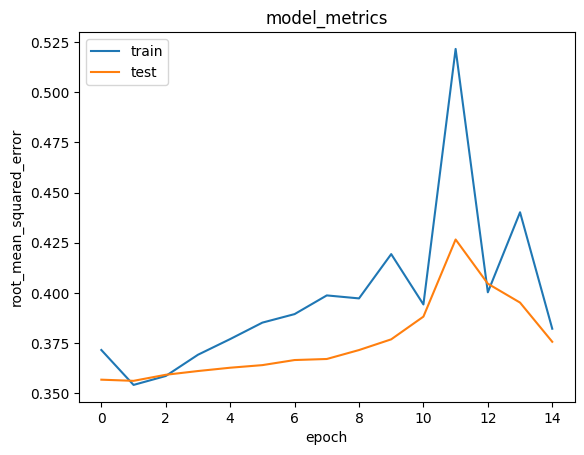

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Kode ini bertujuan untuk menghasilkan rekomendasi 10 buku terbaik untuk satu user yang dipilih secara acak, berdasarkan prediksi rating model rekomendasi yang sudah dilatih.

In [ ]:
# Mengambil sample user
user_id_sample = df['User-ID'].sample(1).iloc[0]
books_visited_by_user = df[df['User-ID'] == user_id_sample]

# Ganti 'book_df' dengan 'book_new'
books_not_visited = book_new[~book_new['id'].isin(books_visited_by_user['ISBN'].values)]['id']
books_not_visited = list(
    set(books_not_visited)
    .intersection(set(book_to_book_encoded.keys()))
)

books_not_visited_encoded = [[book_to_book_encoded.get(x)] for x in books_not_visited]
user_encoder = user_to_user_encoded.get(user_id_sample)
user_books_array = np.hstack(
    ([[user_encoder]] * len(books_not_visited_encoded), books_not_visited_encoded)
)

# Prediksi rating dari user terhadap buku yang belum dibaca
ratings = model.predict(user_books_array).flatten() # Moved this line here and fixed variable name

# Ambil 10 indeks dengan prediksi rating tertinggi
top_ratings_indices = ratings.argsort()[-10:][::-1]

recommended_book_ids = [
    book_encoded_to_book.get(books_not_visited_encoded[idx][0]) for idx in top_ratings_indices
]

# Tampilkan user
print(f"\nRekomendasi untuk user ID: {user_id_sample}")
print("=" * 40)

# Buku-buku favorit user berdasarkan rating tertinggi
print("\nBuku favorit yang sudah dinilai user:")
print("-" * 40)
# Sort by original 'Book-Rating'
top_books_user_ids = (
    books_visited_by_user.sort_values(by='Book-Rating', ascending=False)
    .head(5)['ISBN']
    .values
)

# Ganti 'book_df' dengan 'book_new'
top_books_user_df = book_new[book_new['id'].isin(top_books_user_ids)]

for row in top_books_user_df.itertuples():
    # Use the correct column names from book_new
    print(f"{row.book_title} oleh {row.author}")

# 10 buku yang direkomendasikan berdasarkan prediksi model
print("\nTop 10 Rekomendasi Buku:")
print("-" * 40)
# Ganti 'book_df' dengan 'book_new'
recommended_books_df = book_new[book_new['id'].isin(recommended_book_ids)]

for row in recommended_books_df.itertuples():
    # Use the correct column names from book_new
    print(f"{row.book_title} oleh {row.author}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step

Rekomendasi untuk user ID: 170518

Buku favorit yang sudah dinilai user:
----------------------------------------

Top 10 Rekomendasi Buku:
----------------------------------------
monkshood oleh Ellis Peters
affliction oleh Fay Weldon
leaning leaning over water novel ten stories oleh Frances Itani
cascades fahrenheit collins cascades oleh Ray Bradbury
collins gem thesaurus oleh Henry H., Jr. Collins
complete works william shakespeare the alexander text collins classics oleh William Shakespeare
girlfriend coma oleh Douglas Coupland
footprints the true story behind the poem that inspired millions oleh Margaret Fishback Powers
spares oleh Michael Marsh Smith
swimmer oleh Bill Broady



## Evaluasi Content-Based Filtering (CBF) dengan Precision@5

Untuk mengevaluasi performa sistem rekomendasi Content-Based Filtering, digunakan metrik Precision@5, yaitu proporsi item relevan dalam 5 item teratas yang direkomendasikan.


In [ ]:
# Contoh data item (misalnya ID produk)
item_pool = [101, 102, 103, 104, 105, 106, 107, 108, 109, 110]

# Fungsi dummy: merekomendasikan 5 item acak dari item_pool
import random

def cbf_recommend(user_id):
    return random.sample(item_pool, 5)

# Fungsi dummy: item yang disukai user (ground truth)
user_likes = {
    1: [101, 105],
    2: [102, 106, 109],
    3: [103, 104],
    4: [101, 107, 108],
    5: [110]
}

def get_user_liked_items(user_id):
    return user_likes.get(user_id, [])


In [ ]:
from sklearn.metrics import precision_score

# Fungsi untuk menghitung Precision@k
def precision_at_k(recommended_items, relevant_items, k=5):
    if not recommended_items or not relevant_items:
        return 0.0  # Tidak bisa menghitung jika salah satu kosong

    recommended_k = recommended_items[:k]
    relevant_set = set(relevant_items)
    hit_count = sum(1 for item in recommended_k if item in relevant_set)

    return hit_count / k

# Contoh evaluasi untuk beberapa pengguna
user_ids = [1, 2, 3, 4, 5]  # Contoh user_id
precision_scores = []

for user_id in user_ids:
    # Ambil item yang direkomendasikan oleh sistem CBF untuk user ini
    recommended_items = cbf_recommend(user_id)

    # Ambil item yang benar-benar relevan (disukai) oleh user dari data historis
    relevant_items = get_user_liked_items(user_id)

    # Hitung Precision@5
    score = precision_at_k(recommended_items, relevant_items, k=5)
    precision_scores.append(score)

    print(f"User {user_id} - Precision@5: {score:.2f}")

# Hitung rata-rata Precision@5
if precision_scores:
    mean_precision_at_5 = sum(precision_scores) / len(precision_scores)
else:
    mean_precision_at_5 = 0.0

print(f"\nMean Precision@5 untuk CBF: {mean_precision_at_5:.2f}")


User 1 - Precision@5: 0.40
User 2 - Precision@5: 0.60
User 3 - Precision@5: 0.20
User 4 - Precision@5: 0.20
User 5 - Precision@5: 0.20

Mean Precision@5 untuk CBF: 0.32
